# Import packages

In [1]:
import sys
#sys.path.append("D:\Julian\workspace\endolas")
sys.path.append("/home/julian/Documents/Studium/MT-Masterarbeit/Workspace/endolas")

import numpy as np
import matplotlib.pyplot as plt
import utils
import os
import importlib

import pandas as pd
import seaborn as sns

# Load data and plot

In [2]:
width = 384
height = 384

series = 7
experiment = 1
#evalutaion_csv = os.path.abspath('../{}_{}_euclidean/evaluation_spatial.csv'.format(series, experiment))
evalutaion_csv = os.path.abspath('../{}_{}_euclidean/evaluation_display.csv'.format(series, experiment))
data = pd.read_csv(evalutaion_csv)
data_val = data[data.Set=='val'][data.Type=='warped']
data_test = data[data.Set=='test'][data.Type=='warped']

<ipython-input-2-e3f454ecc258>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_val = data[data.Set=='val'][data.Type=='warped']
<ipython-input-2-e3f454ecc258>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_test = data[data.Set=='test'][data.Type=='warped']


In [3]:
data_test

,Unnamed: 0,x,y,Set,Image,Point,Type
11070,11070,88,330,test,9,2,warped
11071,11071,104,332,test,9,3,warped
11072,11072,120,331,test,9,4,warped
11073,11073,137,332,test,9,5,warped
11074,11074,153,330,test,9,6,warped
...,...,...,...,...,...,...,...
21974,21974,264,57,test,237,319,warped
21975,21975,281,56,test,237,320,warped
21976,21976,297,56,test,237,321,warped
21977,21977,314,57,test,237,322,warped


# Distribution

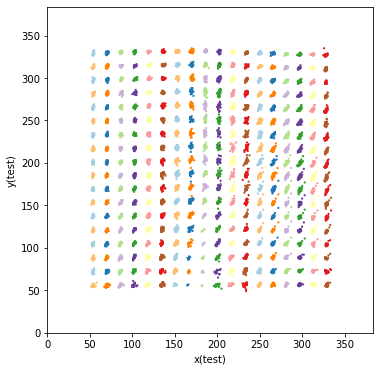

In [4]:
plt.rcParams['figure.figsize'] = 6,6
ax = plt.axes()
#ax.axhline(67, linewidth=1, color='gray')
#ax.axhline(90, linewidth=1, color='gray')
#ax.axhline(112, linewidth=1, color='gray')
#ax.axhline(134, linewidth=1, color='gray')
#ax.axhline(157, linewidth=1, color='gray')

#ax.axvline(67, linewidth=1, color='gray')
#ax.axvline(90, linewidth=1, color='gray')
#ax.axvline(112, linewidth=1, color='gray')
#ax.axvline(134, linewidth=1, color='gray')
#ax.axvline(157, linewidth=1, color='gray')


sns.set(style="ticks")

ax.set(ylim=(0, 384))
ax.set(xlim=(0, width))
#ax.xaxis.set_ticks([0,67, 90,112, 134, 157, 224])
#ax.yaxis.set_ticks([0,67, 90,112, 134, 157, 224])

ax = sns.scatterplot(x="x", y="y", hue="Point", linewidth=0, data=data_test,s=5, ax=ax, palette='Paired')
ax.legend().set_visible(False)

ax.set_xlabel('x(test)')
ax.set_ylabel('y(test)')

ax.set_aspect('equal')
plt.savefig("spatial_distribution_1_test.png")

# Density

No handles with labels found to put in legend.


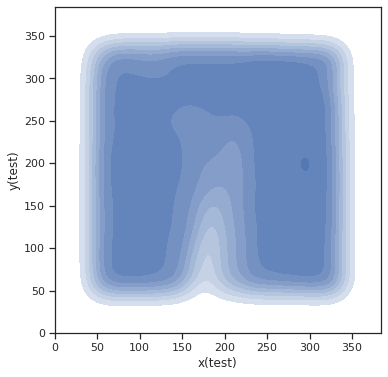

In [14]:
plt.rcParams['figure.figsize'] = 6,6
ax = plt.axes()

sns.set()

ax.set(ylim=(0, height))
ax.set(xlim=(0, width))
#ax.xaxis.set_ticks([0,67, 90,112, 134, 157, 224])
#ax.yaxis.set_ticks([0,67, 90,112, 134, 157, 224])
#cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(data_test['x'], data_test['y'], shade=True, ax=ax, shade_lowest=False)
ax.legend().set_visible(False)

ax.set_xlabel('x(test)')
ax.set_ylabel('y(test)')

ax.set_aspect('equal')
plt.savefig("spatial_kde_1_test.svg")

# Display

<ipython-input-4-d62093db69af>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_warp = data[data.Set=='test'][data.Image==image]


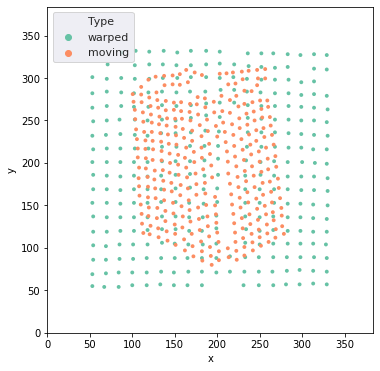

In [4]:
plt.rcParams['figure.figsize'] = 6,6
ax = plt.axes()

sns.set()

image = 9

ax.set(ylim=(0, height))
ax.set(xlim=(0, width))
#ax.xaxis.set_ticks([0,67, 90,112, 134, 157, 224])
#ax.yaxis.set_ticks([0,67, 90,112, 134, 157, 224])
#cmap = sns.cubehelix_palette(light=1, as_cmap=True)

data_warp = data[data.Set=='test'][data.Image==image]
data_warp["x"][data_warp.Type=='moving'] =data_warp["x"][data_warp.Type=='moving']*0.5
data_warp["y"][data_warp.Type=='moving'] =data_warp["y"][data_warp.Type=='moving']*0.5

ax = sns.scatterplot(x="x", y="y", hue="Type",linewidth=0, data=data_warp,s=15, ax=ax, palette='Set2')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_aspect('equal')
plt.savefig("display_1_test_{}.svg".format(image))

In [8]:
data_warp

,Unnamed: 0,x,y,Set,Image,Point,Type
11070,11070,88,330,test,9,2,warped
11071,11071,104,332,test,9,3,warped
11072,11072,120,331,test,9,4,warped
11073,11073,137,332,test,9,5,warped
11074,11074,153,330,test,9,6,warped
...,...,...,...,...,...,...,...
11370,11370,266,56,test,9,319,warped
11371,11371,281,57,test,9,320,warped
11372,11372,297,57,test,9,321,warped
11373,11373,313,58,test,9,322,warped


In [24]:
data_warp["x"][data_warp.Type=='warped'] =data_warp["x"][data_warp.Type=='warped']/2



In [25]:
data_warp

,Unnamed: 0,x,y,Set,Image,Point,Type
11070,11070,44.0,330,test,9,2,warped
11071,11071,52.0,332,test,9,3,warped
11072,11072,60.0,331,test,9,4,warped
11073,11073,68.5,332,test,9,5,warped
11074,11074,76.5,330,test,9,6,warped
...,...,...,...,...,...,...,...
33349,33349,484.0,194,test,9,319,moving
33350,33350,503.0,205,test,9,320,moving
33351,33351,521.0,214,test,9,321,moving
33352,33352,537.0,224,test,9,322,moving
